https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../data/sales/shampoo.csv')
series.drop(36, inplace=True)
series.columns = ['Month','sales']

In [2]:
series.index=pd.to_datetime(series.Month.apply(lambda val: str(2011+int(val[0]))+'-'+ val[2:4]))
series = series.drop('Month',axis=1);

            sales
Month            
2012-01-01  266.0
2012-02-01  145.9
2012-03-01  183.1
2012-04-01  119.3
2012-05-01  180.3


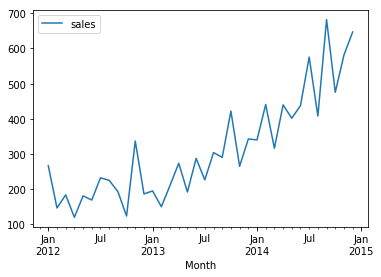

In [3]:
print(series.head())
series.plot()
pyplot.show()

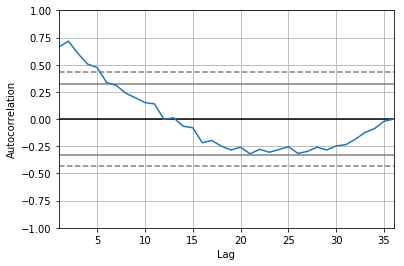

In [4]:
autocorrelation_plot(series)
plt.show()

In [5]:
series.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [6]:
series.index = pd.DatetimeIndex(series.index.values,
                               freq=series.index.inferred_freq)

/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensiona

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 01 Oct 2018   AIC                            406.340
Time:                        13:11:49   BIC                            417.227
Sample:                    02-01-2012   HQIC                           410.098
                         - 12-01-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sales    -0.6203      0.282     

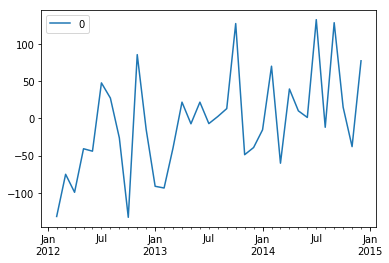

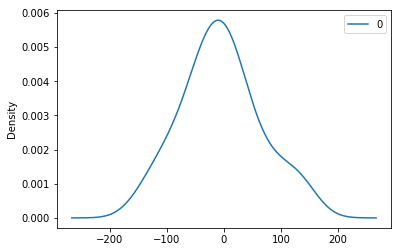

                0
count   35.000000
mean    -5.495279
std     68.132878
min   -133.296671
25%    -42.477991
50%     -7.186660
75%     24.748276
max    133.237902


In [7]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [8]:
test

NameError: name 'test' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [290]:
series = pd.read_csv('../data/timeseries/temperatures.csv',error_bad_lines=False);series.index = pd.to_datetime(series['Date'])
series.columns = ['date','daily_min_temp'];series = series.drop(['date'],axis=1)
err1, err2 = round(values[0].iloc[550:580].mean(),1),round(values[0].iloc[1270:1300].mean(),1)
series['daily_min_temp'].iloc[565] = err1
series['daily_min_temp'].iloc[566] = err1
series['daily_min_temp'].iloc[1290] = err2
values = pd.DataFrame(series['daily_min_temp'].values)
values[0] = pd.to_numeric(values[0],errors='coerce')
dataframe = pd.concat([values.shift(3),values.shift(2),values.shift(1),values], axis=1).dropna()
dataframe.columns = ['t', 't+1','t+2','t+3']
dataframe.corr()

b'Skipping line 3653: expected 2 fields, saw 3\n'


,t,t+1,t+2,t+3
t,1.000000,0.773418,0.630533,0.585996
t+1,0.773418,1.000000,0.773236,0.630130
t+2,0.630533,0.773236,1.000000,0.773032
t+3,0.585996,0.630130,0.773032,1.000000


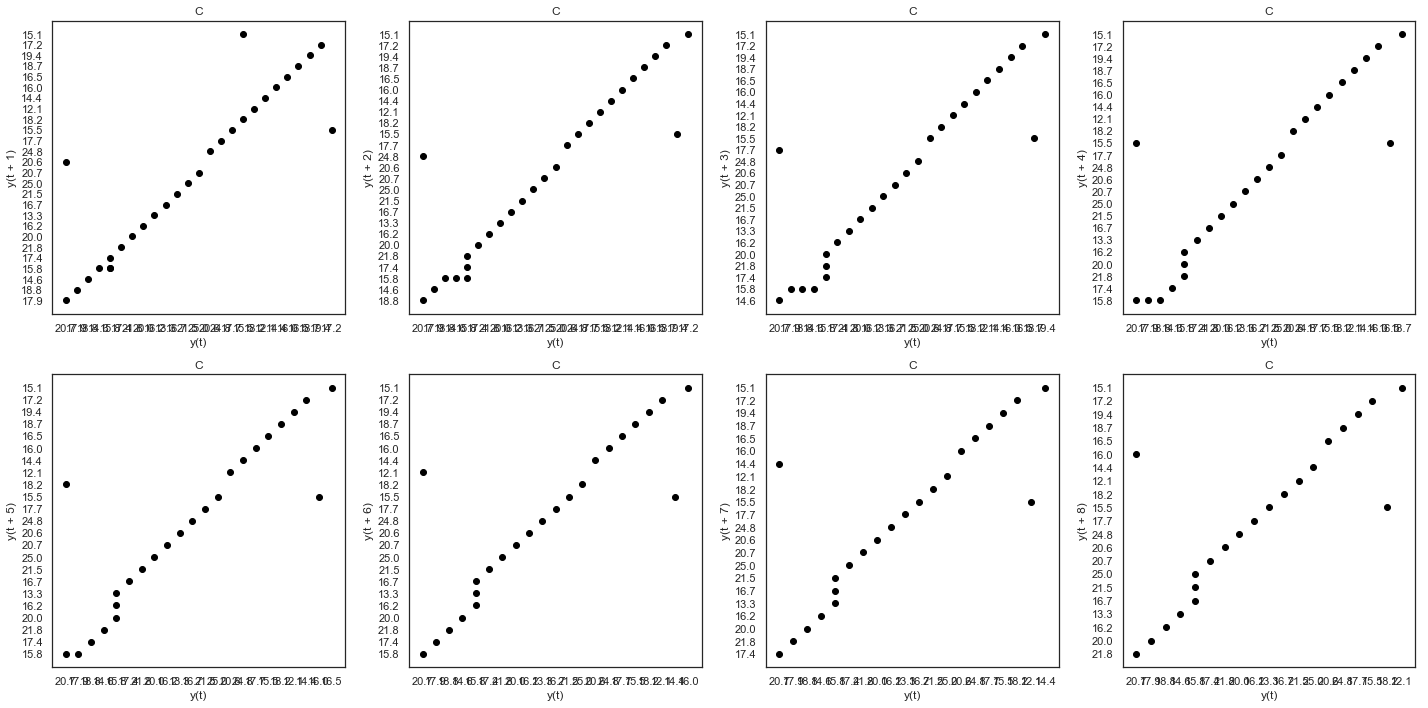

In [291]:
fig = plt.figure(figsize=(20,10))
for num in range(1,9):
    ax = fig.add_subplot(2,4,num)
    pd.plotting.lag_plot(series['daily_min_temp'].iloc[0:30],lag=num,c='black')
    ax.set_title(c)

plt.tight_layout()
plt.show()

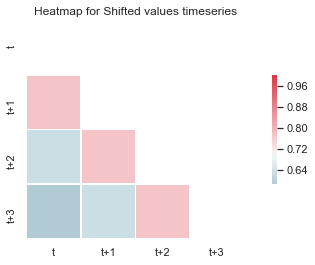

In [297]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = dataframe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=.7,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap for Shifted values timeseries');plt.show()

In [200]:
from sklearn.metrics import mean_squared_error

Test MSE: 3.933


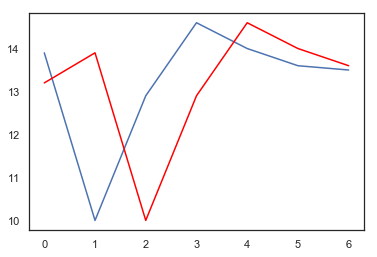

In [204]:
if len(dataframe.columns)>2:
    dataframe = dataframe.drop(['t+2','t+3'],axis=1)
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [298]:
if len(dataframe.columns)>2:
    dataframe = dataframe.drop(['t+2','t+3'],axis=1)
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

Test MSE: 3.933


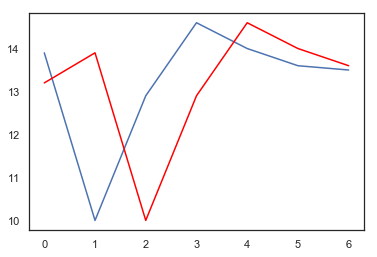

In [299]:
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [300]:
from statsmodels.tsa.ar_model import AR
X = values[0].tolist()
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 29
Coefficients: [ 5.58527523e-01  5.83281329e-01 -8.60559949e-02  4.58779764e-02
  4.27068345e-02  3.88591523e-02  2.52740419e-02  4.52929161e-02
  1.26051409e-02  3.68337217e-02 -3.13501697e-04  3.54814148e-03
  1.76170208e-02  2.89991091e-02  2.41938497e-03  2.12256693e-02
  8.88969758e-03  9.72640925e-03  3.32914128e-02 -1.00162722e-02
  2.74855476e-02  2.02674362e-02  1.10326070e-02 -1.73903782e-02
 -3.42951696e-03  1.63423410e-02  2.01206280e-02  9.78698634e-03
  6.20604538e-03 -1.21414299e-03]
predicted=11.916081, expected=12.900000
predicted=13.094757, expected=14.600000
predicted=13.564181, expected=14.000000
predicted=13.269235, expected=13.600000
predicted=13.100150, expected=13.500000
predicted=13.141059, expected=15.700000
predicted=13.163035, expected=13.000000
Test MSE: 1.467


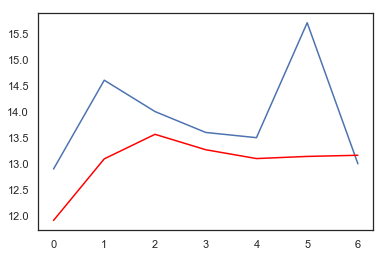